In [80]:
!pip install contextily

In [81]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString
import folium
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap
import contextily
import matplotlib.pyplot as plt
import contextily as ctx

In [82]:
# modify the address of the barc.zip and src.zip based on their locations
zip_ref = zipfile.ZipFile('/content/barc.zip', 'r'); zip_ref.extractall(); zip_ref.close()
zip_ref = zipfile.ZipFile('/content/src.zip', 'r'); zip_ref.extractall(); zip_ref.close()


In [83]:
# districtes = gpd.read_file('/content/src/0301040100_AEB_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_Area_I_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_Barris_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_Districtes_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_GranBarri_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_SecCens_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_TermeMunicipal_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_ZUA_UNITATS_ADM.shp')






In [84]:
districtes = gpd.read_file('/content/src/0301040100_Districtes_UNITATS_ADM.shp')
districtes.head(10)

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((427826.987 4586145.355, 427836.537 4..."
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((429793.927 4589028.390, 429788.121 4..."
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432115.848 4590999.098, 432119.430 4..."
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432158.516 4590377.238, 432158.904 4..."
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((433770.023 4586475.362, 433737.125 4..."


<Axes: >

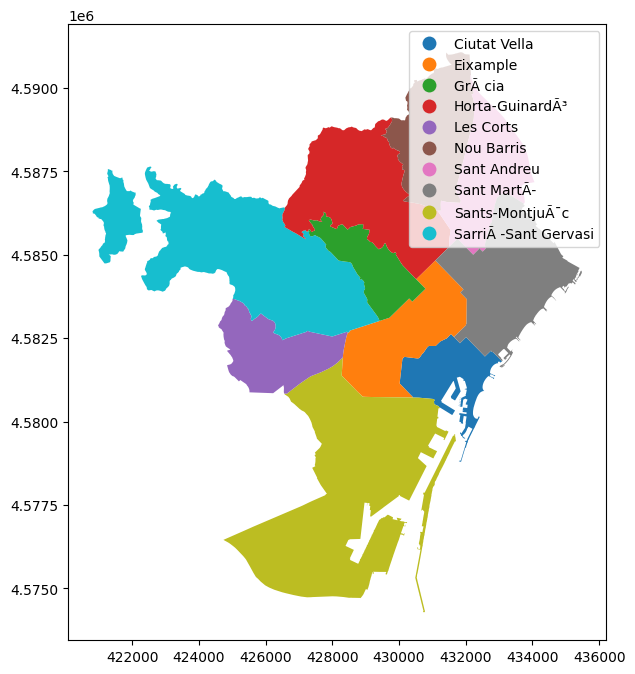

In [25]:
districtes.plot(column='NOM', legend=True,figsize=(15,8))

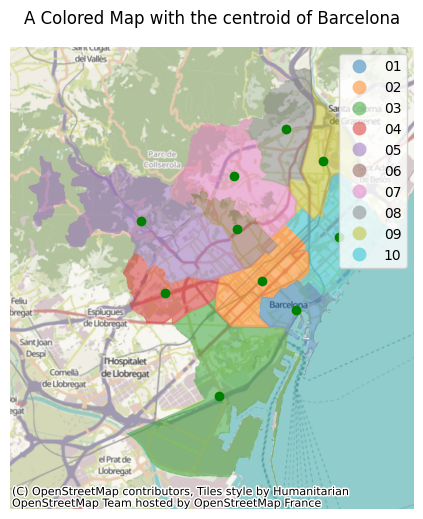

In [26]:
ax= districtes.plot(column='DISTRICTE', figsize=(12,6), alpha=0.5, legend=True)
districtes['centroid'] = districtes['geometry'].centroid
districtes['centroid'].plot(ax=ax, color="green")
ctx.add_basemap(ax, crs=districtes.crs.to_string())
plt.title('A Colored Map with the centroid of Barcelona')
plt.axis('off')
plt.show()

In [54]:
districtes_chunk = districtes[['NOM', 'LITERAL', 'PERIMETRE', 'AREA', 'geometry']]

In [85]:
habitantes = pd.read_csv('/content/barc/Habitantes.csv', sep=";")
habitantes.head()

,Distrito,Habitantes
0,Eixample,270694
1,Sant Martí,241691
2,Sants-Montjuïc,187584
3,Horta-Guinardó,174799
4,Nou Barris,174012


In [56]:
districtes['NOM']

0            Ciutat Vella
1                Eixample
2         Sants-MontjuÃ¯c
3               Les Corts
4    SarriÃ -Sant Gervasi
5                 GrÃ cia
6         Horta-GuinardÃ³
7              Nou Barris
8             Sant Andreu
9             Sant MartÃ­
Name: NOM, dtype: object

In [57]:
habitantes['Distrito']

0               Eixample
1             Sant Martí
2         Sants-Montjuïc
3         Horta-Guinardó
4             Nou Barris
5            Sant Andreu
6    Sarrià-Sant Gervasi
7                 Gràcia
8           Ciutat Vella
9              Les Corts
Name: Distrito, dtype: object

In [58]:
mapDis = {'Ciutat Vella': 'Ciutat Vella',
       'Eixample': 'Eixample',
       'Sants-MontjuÃ¯c': 'Sants-Montjuïc',
       'Les Corts': 'Les Corts',
       'SarriÃ -Sant Gervasi': 'Sarrià-Sant Gervasi',
       'GrÃ cia': 'Gràcia',
       'Horta-GuinardÃ³': 'Horta-Guinardó',
       'Nou Barris': 'Nou Barris',
       'Sant Andreu': 'Sant Andreu',
       'Sant MartÃ­': 'Sant Martí'}

In [59]:
districtes_chunk['NOM']

0            Ciutat Vella
1                Eixample
2         Sants-MontjuÃ¯c
3               Les Corts
4    SarriÃ -Sant Gervasi
5                 GrÃ cia
6         Horta-GuinardÃ³
7              Nou Barris
8             Sant Andreu
9             Sant MartÃ­
Name: NOM, dtype: object

In [60]:
districtes_chunk['NOM'] = districtes_chunk['NOM'].map(mapDis)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [61]:
districtes_chunk['NOM']

0      Ciutat Vella
1          Eixample
2    Sants-Montjuïc
3         Les Corts
4               NaN
5               NaN
6    Horta-Guinardó
7        Nou Barris
8       Sant Andreu
9        Sant Martí
Name: NOM, dtype: object

In [62]:
# districtes_chunk['MergeColumn'] = habitantes['Distrito'].map(mapDis)
# districtes_chunk.head(10)

In [63]:
merged_df = districtes_chunk.merge(habitantes, left_on='NOM', right_on='Distrito')

In [65]:
# merged_df = merged_df.drop(columns=['MergeColumn'])
merged_df

,NOM,LITERAL,PERIMETRE,AREA,geometry,Distrito,Habitantes
0,Ciutat Vella,01,21366.962,4.204931e+06,"POLYGON ((431733.736 4582441.816, 431827.673 4...",Ciutat Vella,108331
1,Eixample,02,13931.644,7.464303e+06,"POLYGON ((432033.184 4583665.032, 432032.069 4...",Eixample,270694
2,Sants-Montjuïc,03,46711.857,2.287985e+07,"MULTIPOLYGON (((428773.911 4580873.742, 428833...",Sants-Montjuïc,187584
3,Les Corts,04,12551.602,6.010769e+06,"POLYGON ((425054.670 4583672.560, 425062.830 4...",Les Corts,82635
4,Horta-Guinardó,07,20607.189,1.191963e+07,"POLYGON ((429793.927 4589028.390, 429788.121 4...",Horta-Guinardó,174799
5,Nou Barris,08,14707.881,8.056468e+06,"POLYGON ((432115.848 4590999.098, 432119.430 4...",Nou Barris,174012
6,Sant Andreu,09,15121.527,6.592480e+06,"POLYGON ((432158.516 4590377.238, 432158.904 4...",Sant Andreu,151976
7,Sant Martí,10,23493.828,1.043670e+07,"POLYGON ((433770.023 4586475.362, 433737.125 4...",Sant Martí,241691


<Axes: >

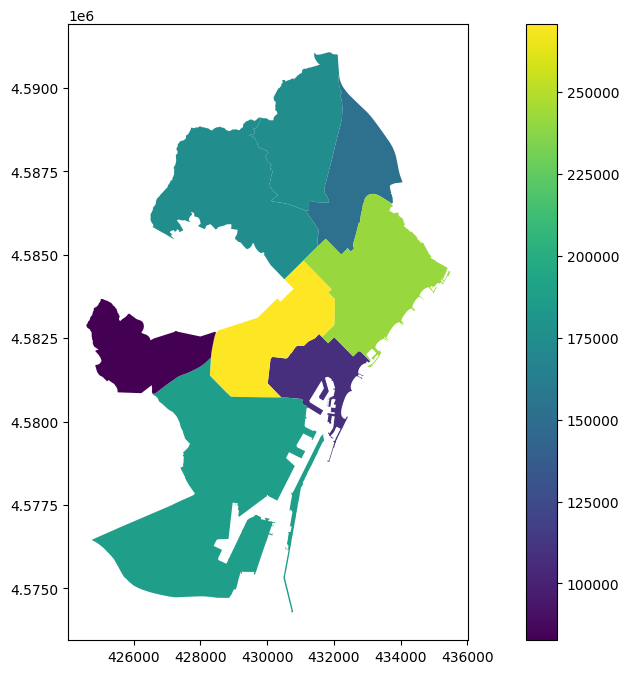

In [66]:
merged_df.plot(column='Habitantes', legend=True,figsize=(15,8))

In [38]:
# unique_categories = merged_df['AREA'].unique()
# num_rows = 1  # Change as needed
# num_cols = len(unique_categories)
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5))

# for i, category in enumerate(unique_categories):
#     subset_gdf = merged_df[merged_df['AREA'] == category]
#     ax = axes[i] if num_rows == 1 else axes[0, i]
#     subset_gdf.plot(ax=ax, legend=True)
#     ax.set_title(category)

# for i in range(len(unique_categories), num_cols):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.show()

In [86]:
from sklearn.cluster import KMeans

# Perform clustering based on 'area'
area_clusters = KMeans(n_clusters=4).fit(merged_df[['AREA']])

# Perform clustering based on 'habitant'
habitant_clusters = KMeans(n_clusters=4).fit(merged_df[['Habitantes']])

# Perform clustering based on 'density'
merged_df['Density'] = merged_df['Habitantes'] / merged_df['AREA']
density_clusters = KMeans(n_clusters=4).fit(merged_df[['Density']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


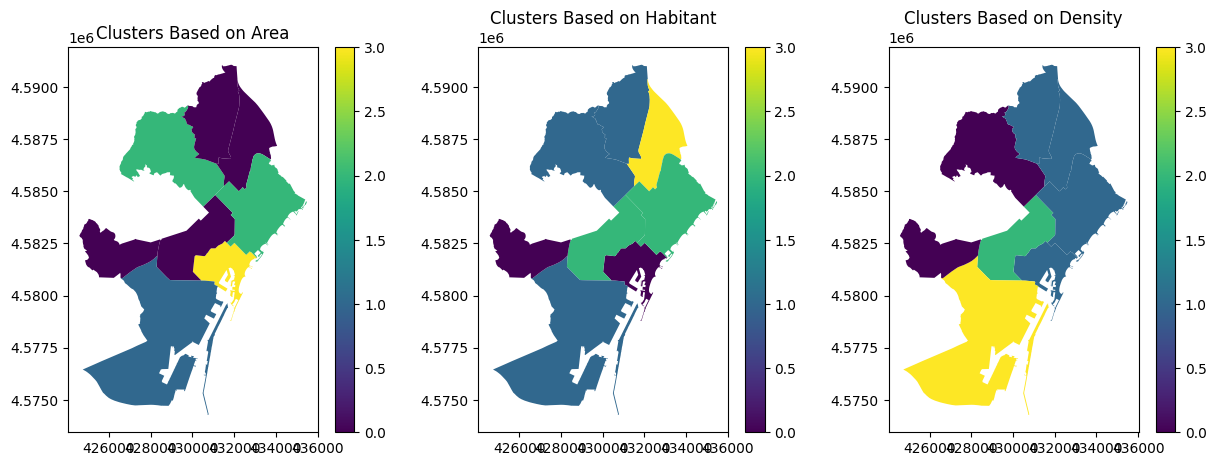

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot clusters based on area
merged_df['area_cluster'] = area_clusters.labels_
merged_df.plot(column='area_cluster', ax=axes[0], legend=True)
axes[0].set_title('Clusters Based on Area')

# Plot clusters based on habitant
merged_df['habitant_cluster'] = habitant_clusters.labels_
merged_df.plot(column='habitant_cluster', ax=axes[1], legend=True)
axes[1].set_title('Clusters Based on Habitant')

# Plot clusters based on density
merged_df['density_cluster'] = density_clusters.labels_
merged_df.plot(column='density_cluster', ax=axes[2], legend=True)
axes[2].set_title('Clusters Based on Density')

plt.show()


In [75]:
density_clusters.labels_

array([2, 0, 3, 1, 1, 2, 2, 2], dtype=int32)

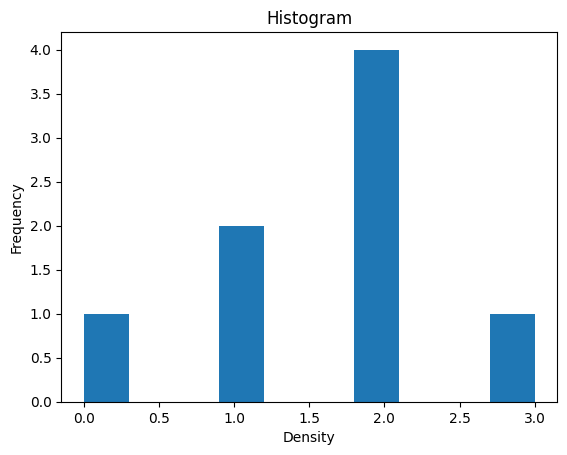

In [76]:
import matplotlib.pyplot as plt

plt.hist(density_clusters.labels_)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

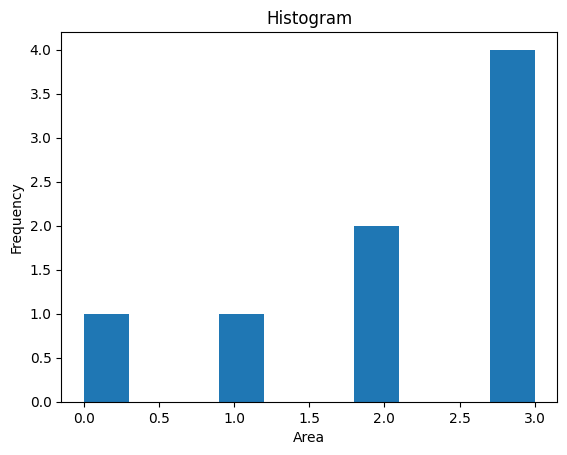

In [77]:
plt.hist(area_clusters.labels_)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

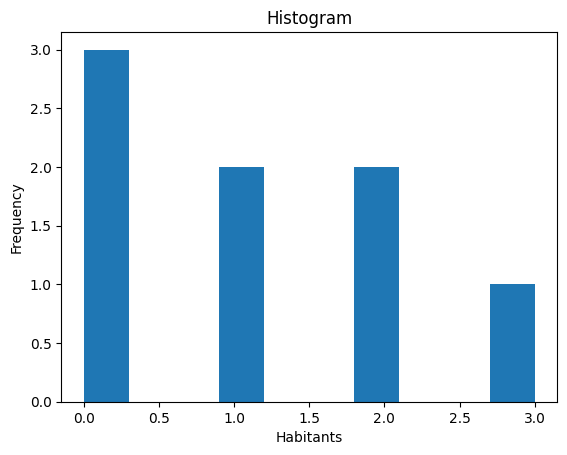

In [78]:
plt.hist(habitant_clusters.labels_)
plt.xlabel('Habitants')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()